In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/AI/deep/second_project/train_data.csv'
df = pd.read_csv(file_path)
df.head()

<ipython-input-2-aaa47d0a5561>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


<ipython-input-3-55ebe0f3911c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette='viridis')


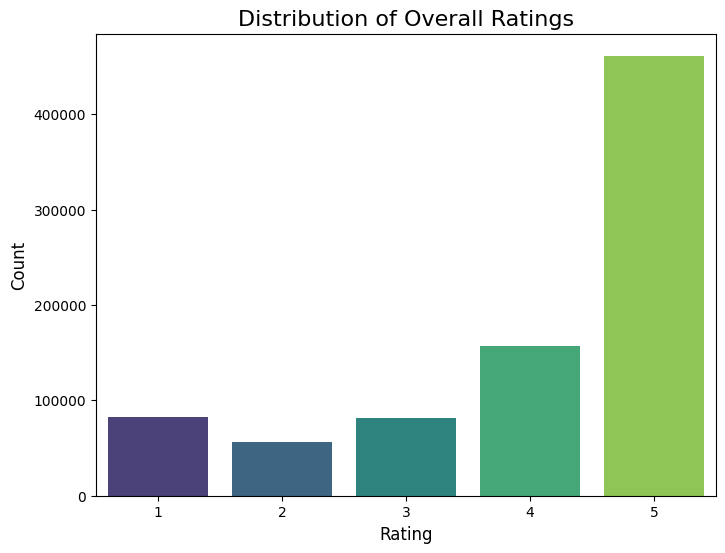

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df, palette='viridis')
plt.title('Distribution of Overall Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


خب طبیعتا نتیجه نمودار نشون میده که مجموعه داده هامون متوازن نیتسن و نیاز داریم که متوازنش کنیم چون اگه به همین شکل باقی بمونه مدل ممکنه به سمت دسته ای که داده بیشتری داره تمایل پیدا کنه و نتایج پیش بینی نادرست باشن
اما برای متوازن کردن میتونیم چند تا راه حل رو امتحان کنیم :
1 - undersampling : بیایم تعداد نمونه های کلاس های پرجمعیت رو کمتر کنیم
2 - over sampling : بیایم  تعداد نمونه‌های کلاس‌های کم جمعیت رو با تکرار داده‌های موجود یا تولید داده‌های مصنوعی افزایش بدیم مثل روش SMOTE
3 - ترکیبی از روش های بالا :
یعنی برای کلاس های پرجچمعیت از oversampling
و برای کلاس های کم چمعیت از undersampling
4 -  Class Weighting : می تونیم به جای تغییر تعداد نمونه ها حین اموزش مدل به کلاس های کم جمعیت وزن بیشتری بدیم



In [4]:


# تقسیم‌بندی نظرات به سه دسته
positive_reviews = df[df['overall'].isin([4, 5])]
neutral_reviews = df[df['overall'] == 3]
negative_reviews = df[df['overall'].isin([1, 2])]

print(f"تعداد نظرات مثبت: {len(positive_reviews)}")
print(f"تعداد نظرات خنثی: {len(neutral_reviews)}")
print(f"تعداد نظرات منفی: {len(negative_reviews)}")


تعداد نظرات مثبت: 617999
تعداد نظرات خنثی: 81239
تعداد نظرات منفی: 139706


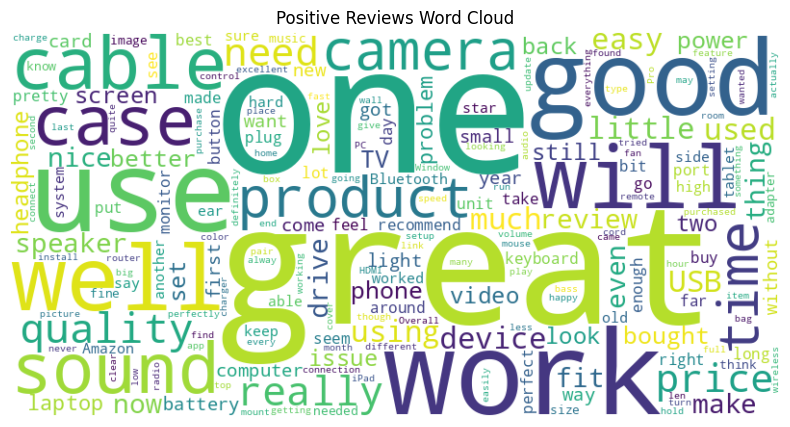

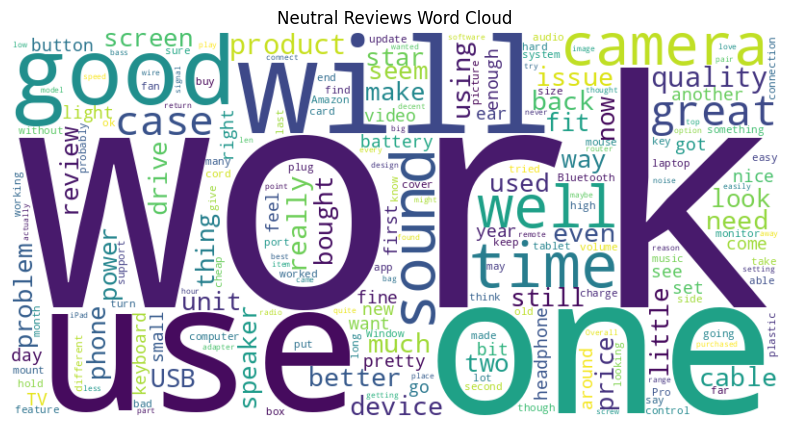

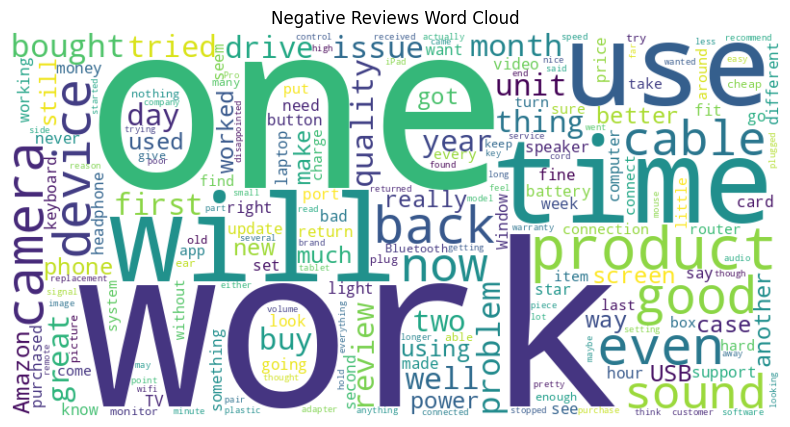

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# تابع رسم ابر کلمات
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=STOPWORDS, collocations=False).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# متن برای هر دسته
positive_text = ' '.join(positive_reviews['reviewText'])
neutral_text = ' '.join(neutral_reviews['reviewText'])
negative_text = ' '.join(negative_reviews['reviewText'])

# رسم ابر کلمات برای هر دسته
plot_wordcloud(positive_text, 'Positive Reviews Word Cloud')
plot_wordcloud(neutral_text, 'Neutral Reviews Word Cloud')
plot_wordcloud(negative_text, 'Negative Reviews Word Cloud')


In [6]:
# مجموعه‌ای از کلمات یکتا برای هر دسته
positive_words = set(positive_text.split())
negative_words = set(negative_text.split())

# پیدا کردن کلمات مشترک
common_words = positive_words.intersection(negative_words)

print("کلمات مشترک بین دسته‌های مثبت و منفی:")
print(common_words)


کلمات مشترک بین دسته‌های مثبت و منفی:
{'uncontrollably', '(Hello', 'VELCRO', '5v.', 'Yacht', 'Mid-2014', '$25-30', '2.1A,', 'why),', 'unto', 'ng', 'macros,', 'traps.', 'environment...', 'Really,', 'intrude', 'plugs..', 'CF', 'winded', 'ICF-P36', '7.5mm', 'warmly', 'means)...', '(-1', "'er", 'to?', '200watt', '80hz', 'pigment', 'signal:', '2-2,', 'Turret', 'clasp,', '4-6"', 'church.', 'redundancy', 'did...', 'TR2', 'PS4)', 'chlorine', 'issues...until', "'well", '(expected', 'SUNDELY', 'GOOD!', 'SP550', 'suites', 'denoting', '73%.', 'FZ200', '010', 'Chromium,', '~130', 'cloud)', 'normalization', 'attention.)', 'adorable.', 'input",', 'BLESS', 'forearm,', 'tablets.)', 'At&t', 'resistors', '$40-$50', 'Reduces', 'Kaito', 'disperses', 'mackbook', 'highlight.', 'whatsoever?', 'Teh', '144+', 'postal', 'instructables', 'tech...', 'Emphasis', 'vest', 'mailing.', 'falls.', 'Model)</a>', 'Matebook.', 'cracking?', 'synchronization,', 'policy]', 'positions;', 'noise-isolating.', 'braket', 'Spectrum/

In [8]:
# محاسبه مجموع نظرات هر نظر دهنده
top_reviewers = df.groupby('reviewerID')['vote'].sum().reset_index()

# مرتب‌سازی نزولی
top_reviewers = top_reviewers.sort_values(by='vote', ascending=False)

top_10_reviewers = top_reviewers.head(10)
print(top_10_reviewers)


            reviewerID    vote
97732   A25GROL6KJV3QG  4572.0
218123  A3KJ0DF3LTNJ6X  3181.0
128674  A2IK776FY6MEMG  3150.0
48709   A1KPFZCS71QKW5  2978.0
290448   AMYCUX8EWEUVV  2631.0
268447    ADLVFFE4VBT8  2607.0
38885   A1GHPJB2N0D0RL  2167.0
312277   AW7UMXXJKFSNS  1912.0
177439  A33AN9NP6574M2  1867.0
159458  A2VQ0V1TWXF3U7  1820.0


In [7]:
print(df['vote'].dtype)
print(df['vote'].unique())

# حذف فاصله‌ها و کاماها، سپس تبدیل به نوع عددی
df['vote'] = df['vote'].replace({' ': '', ',': ''}, regex=True)
df['vote'] = pd.to_numeric(df['vote'], errors='coerce')

# جایگزینی مقادیر NaN با 0
df['vote'] = df['vote'].fillna(0)

print(df[['vote']].head(10))


object
[nan 4.0 2.0 10.0 3.0 5.0 7.0 14.0 6.0 11.0 58.0 8.0 16.0 9.0 12.0 22.0
 15.0 13.0 128.0 47.0 20.0 35.0 18.0 19.0 46.0 23.0 164.0 28.0 27.0 244.0
 17.0 48.0 21.0 45.0 36.0 43.0 80.0 61.0 39.0 91.0 161.0 26.0 135.0 117.0
 70.0 49.0 83.0 30.0 96.0 25.0 38.0 142.0 159.0 270.0 54.0 240.0 31.0 74.0
 125.0 60.0 69.0 199.0 90.0 33.0 382.0 56.0 24.0 42.0 283.0 138.0 50.0
 139.0 29.0 231.0 107.0 41.0 32.0 51.0 34.0 52.0 442.0 248.0 67.0 71.0
 84.0 37.0 111.0 44.0 55.0 40.0 62.0 65.0 205.0 320.0 124.0 75.0 152.0
 63.0 72.0 95.0 68.0 64.0 180.0 86.0 53.0 112.0 101.0 105.0 88.0 184.0
 145.0 173.0 335.0 156.0 110.0 92.0 82.0 106.0 174.0 85.0 187.0 66.0 172.0
 76.0 131.0 384.0 57.0 595.0 108.0 331.0 241.0 115.0 178.0 136.0 394.0
 313.0 269.0 59.0 77.0 127.0 169.0 322.0 134.0 200.0 141.0 104.0 99.0
 334.0 465.0 100.0 73.0 529.0 196.0 190.0 225.0 923.0 87.0 103.0 123.0
 97.0 176.0 236.0 267.0 79.0 303.0 319.0 441.0 129.0 272.0 332.0 93.0
 204.0 126.0 318.0 920.0 130.0 177.0 171.0 119.0 216.0 16

In [9]:
# محاسبه طول متن reviewText
df['reviewLength'] = df['reviewText'].str.len()
print(df['reviewLength'].describe())


count    838944.000000
mean        624.687384
std         684.129474
min         200.000000
25%         277.000000
50%         408.000000
75%         697.000000
max       29146.000000
Name: reviewLength, dtype: float64


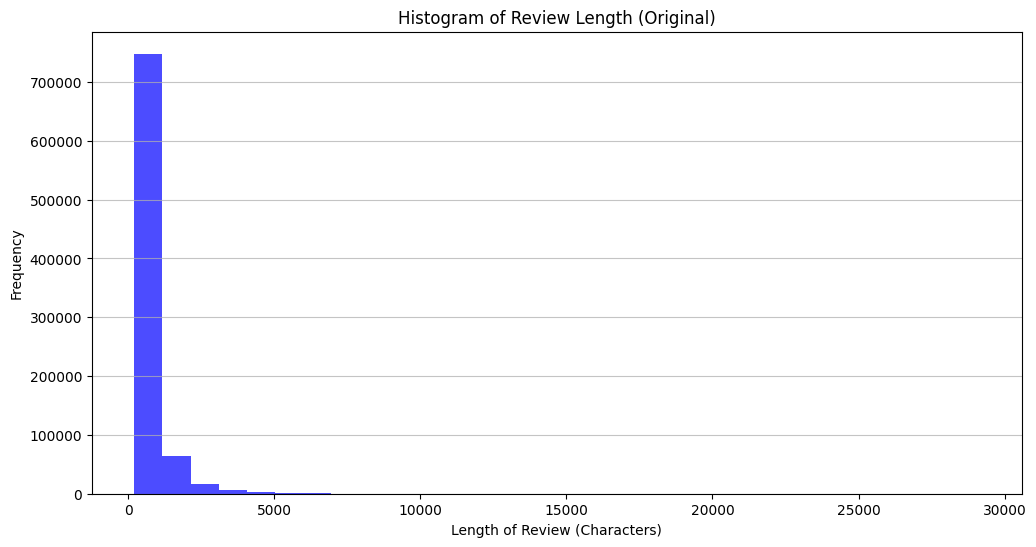

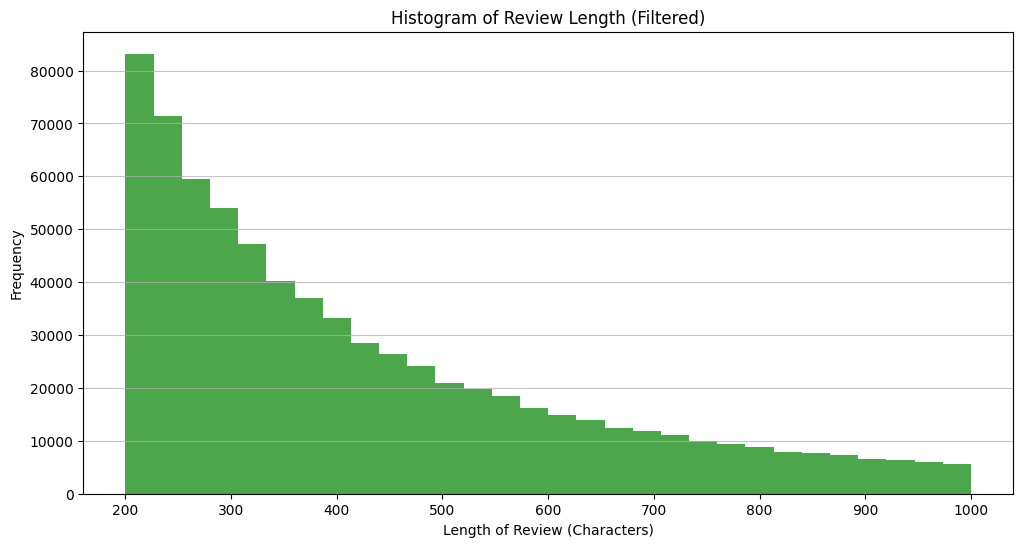

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# حالت اصلی
plt.figure(figsize=(12, 6))
plt.hist(df['reviewLength'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Review Length (Original)')
plt.xlabel('Length of Review (Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# فیلتر کردن نظرات
filtered_df = df[(df['reviewLength'] >= 200) & (df['reviewLength'] <= 1000)]

# حالت فیلتر شده
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['reviewLength'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Review Length (Filtered)')
plt.xlabel('Length of Review (Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [11]:
file_path = '/content/drive/MyDrive/AI/deep/second_project/title_brand.csv'

product_mapping = pd.read_csv(file_path)

print(product_mapping.head())


         asin                                              title  \
0  0011300000  Genuine Geovision 1 Channel 3rd Party NVR IP S...   
1  0043396828  Books "Handbook of Astronomical Image Processi...   
2  0060009810                                     One Hot Summer   
3  0060219602  Hurray for Hattie Rabbit: Story and pictures (...   
4  0060786817                     sex.lies.murder.fame.: A Novel   

                                          brand  
0                                     GeoVision  
1                                  33 Books Co.  
2  Visit Amazon's Carolina Garcia Aguilera Page  
3           Visit Amazon's Dick Gackenbach Page  
4              Visit Amazon's Lolita Files Page  


In [12]:
merged_df = pd.merge(df, product_mapping, on='asin')
df_5_star = merged_df[merged_df['overall'] == 5]
top_products_5_star = df_5_star.groupby(['brand', 'title']).size().reset_index(name='num_reviews_5_star')
top_10_products = top_products_5_star.sort_values(by='num_reviews_5_star', ascending=False).head(10)
print(top_10_products[['brand', 'title', 'num_reviews_5_star']])


                      brand  \
10992  Cambridge Soundworks   
39460               NETGEAR   
49185                  Roku   
56451              StarTech   
34377              Logitech   
51240               Samsung   
39416               NETGEAR   
5073                   Asus   
63425             VideoSecu   
12377               Cheetah   

                                                   title  num_reviews_5_star  
10992  OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...                1163  
39460          NETGEAR N300 WiFi Range Extender (EX2700)                 659  
49185  Roku Streaming Stick (3600R) - HD Streaming Pl...                 600  
56451  StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...                 598  
34377  Logitech M570 Wireless Trackball Mouse &ndash;...                 552  
51240  Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...                 529  
39416  NETGEAR 5-Port Gigabit Ethernet Unmanaged Swit...                 482  
5073   ASUS Tri-Band Gigab

In [13]:
merged_df = pd.merge(df, product_mapping, on='asin')
brand_review_count = merged_df.groupby('brand').size().reset_index(name='review_count')
top_10_brands = brand_review_count.nlargest(10, 'review_count')
brand_avg_rating = merged_df.groupby('brand')['overall'].mean().reset_index(name='avg_rating')
top_10_brands_avg = pd.merge(top_10_brands, brand_avg_rating, on='brand')
top_10_brands_avg_sorted = top_10_brands_avg.sort_values(by='avg_rating', ascending=False)
print(top_10_brands_avg_sorted[['brand', 'avg_rating']])

          brand  avg_rating
5         Anker    4.244320
2  AmazonBasics    4.201468
8       Sabrent    4.028005
7       SanDisk    3.958810
0      Logitech    3.954061
1       Samsung    3.941268
3          Sony    3.938726
6       TP-LINK    3.928681
4          Asus    3.855550
9       NETGEAR    3.836274
